# Demonstration of Pulse and Signal Classes

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import src.signal.signal as sgl
import src.signal.pulse as pls

## The Pulse Class

In [3]:
#default values for pulse parameters:
pls.Pulse()

pulse_period: 0.7, pulse_width: 0.05, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 1.0, pulse_type: gaussian, pulse_sigma: 1

In [4]:
#optional name and description
pls.Pulse(name='Kevin', description='an interesting pulse')

name: Kevin, description: an interesting pulse, pulse_period: 0.7, pulse_width: 0.05, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 1.0, pulse_type: gaussian, pulse_sigma: 1

In [5]:
#dictionary version:
pls.Pulse(name='Kevin', description='an interesting pulse').to_dict()

{'name': 'Kevin',
 'description': 'an interesting pulse',
 'pulse_period': 0.7,
 'pulse_width': 0.05,
 'pulse_phase': 3.141592653589793,
 'pulse_peaks': True,
 'pulse_height': 1.0,
 'pulse_type': 'gaussian',
 'pulse_sigma': 1}

## Pulse Types and their Profiles

In [6]:
#the pulse types
pls.Pulse._pulsetypes

['square', 'left triangle', 'right triangle', 'triangle', 'gaussian']

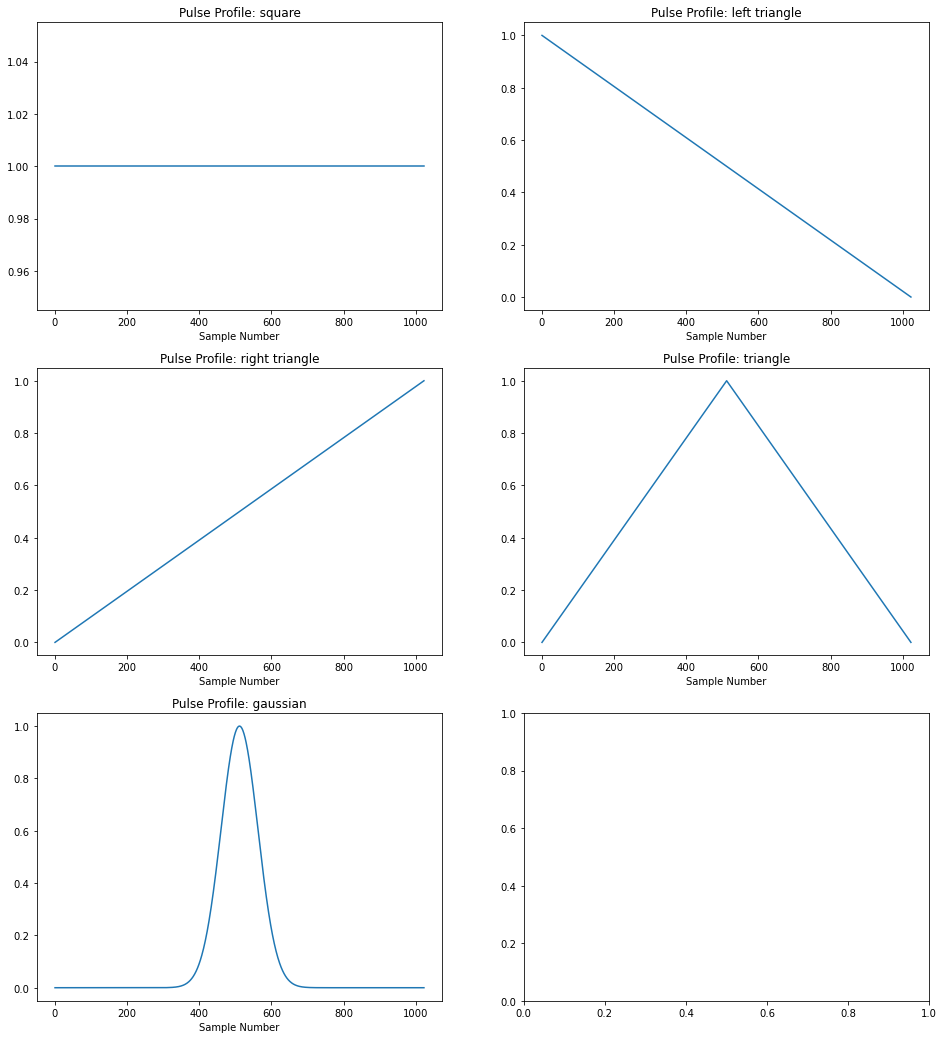

In [7]:
#what they look like
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,18))
for pt, ax in zip(pls.Pulse._pulsetypes, axs.flatten()):
    ax.plot(pls.Pulse(pulse_type=pt)._pulse_profile(1024))
    ax.set_title(f'Pulse Profile: {pt}')
    ax.set_xlabel('Sample Number')

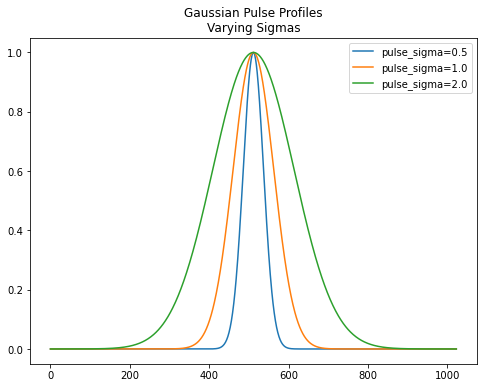

In [8]:
#gaussian profile has sigma parameter to control width:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
for ps in [0.5,1.0, 2.0]:
    ax.plot(pls.Pulse(pulse_type='gaussian', pulse_sigma=ps)._pulse_profile(1024),
        label = f'pulse_sigma={ps}')
ax.set_title('Gaussian Pulse Profiles\nVarying Sigmas')
ax.legend()

### Pulse Period, Width, and Phase

The `Pulse.pulse_signal(tsamp=1./1024, sigdur=300)` method produces a pulse train of a given duration at a given sampling interval.  Both parameters are in seconds.

Below we create several 5 second pulse trains varying the properties of the individual pulses.

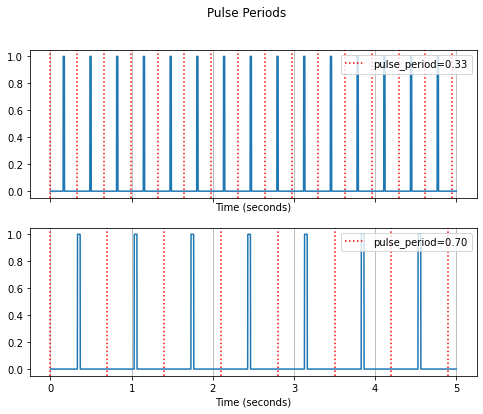

In [9]:
#compare 0.33 and 0.7 pulse periods
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pp, ax in zip([0.33, 0.7],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse =  pls.Pulse(pulse_type='square', pulse_period=pp)

    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur))#,
        #label = f'pulse_period={pp}')
    for pb in phase_breaks:
        hdl = ax.axvline(pb, color='red', alpha=1.0, ls=':')

    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')

    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Pulse Periods')

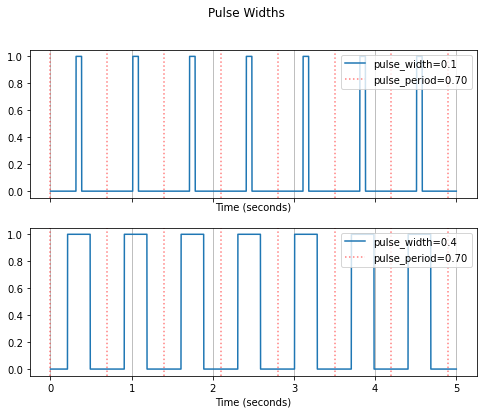

In [10]:
#compare pulse width of 0.1 (default) and 0.4
#pulse widths are fraction of pulse period that pulse occupies
#square pulses for illustration
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pw, ax in zip([0.1, 0.4],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse =  pls.Pulse(pulse_type='square', pulse_width=pw)
    
    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur),
        label = f'pulse_width={pw}')
    for pb in phase_breaks:
        hdl = ax.axvline(pb, color='red', alpha=0.5, ls=':')

    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')

    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Pulse Widths')

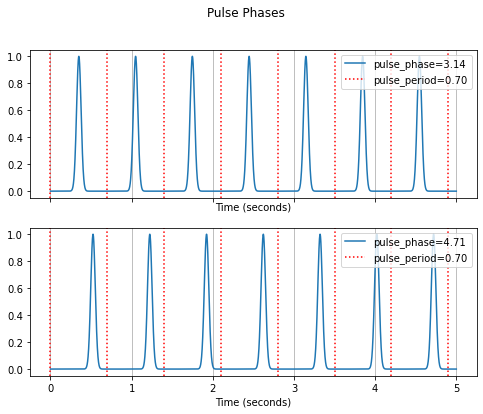

In [11]:
#compare phases
#pulses are centered in pulse period at pi radians (default)
#shift to 3/2 pi (should move pulse to left in signal)
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pw, ax in zip([np.pi, 3*np.pi/2],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse = pls.Pulse(pulse_type='gaussian',pulse_width=0.4, pulse_sigma=2, pulse_phase=pw)
    
    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur),
        label = f'pulse_phase={pw:.2f}')
    for pb in phase_breaks:
        hdl=ax.axvline(pb, color='red', alpha=1.0, ls=':')

    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')

    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Pulse Phases')

### Peaks and Valleys

The `pulse_peaks` parameter controls whether pulse peaks (True) or pulse valleys (False) are produced.

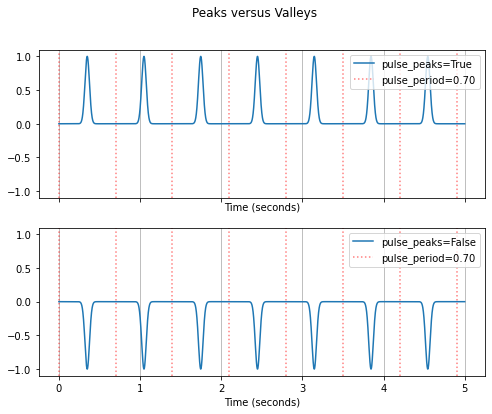

In [12]:
#show peaks versus vallyes
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pw, ax in zip([True, False],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse = pls.Pulse(pulse_type='gaussian',pulse_width=0.4, pulse_sigma=2,pulse_peaks=pw)
    
    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur),
        label = f'pulse_peaks={pw}')
    for pb in phase_breaks:
        hdl = ax.axvline(pb, color='red', alpha=0.5, ls=':')
    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')
    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Peaks versus Valleys')

## Signal Class

/home/kevin_leo_mcmanus/anaconda3/envs/astro2/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


<AxesSubplot:title={'center':'Time Domain'}, xlabel='Time (Seconds)'>

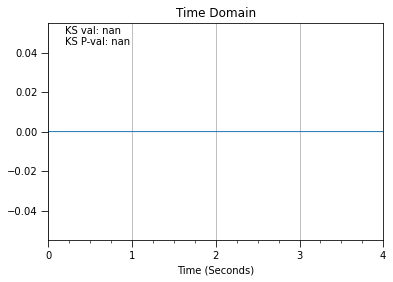

In [13]:
#create a signal. Flat line by default
sig = sgl.Signal()
#time domain plot of signal with nothing in it
sig.plot_signal()

<AxesSubplot:title={'center':'Time Domain'}, xlabel='Time (Seconds)'>

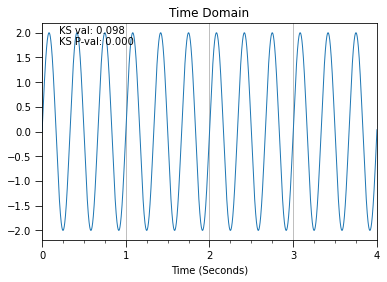

In [14]:
# create sinusoidal signal by passing dict of parameters
# sinusoidal properties consist of amplitude, frequency and phase
sgl.Signal(sinprops= {'amplitude':2, 'frequency':3, 'phase':0}).plot_signal()

<AxesSubplot:title={'center':'Time Domain'}, xlabel='Time (Seconds)'>

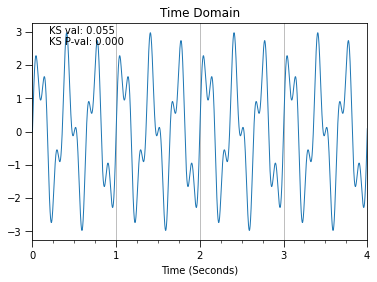

In [26]:
#sinprops can be a list of sinusoidal properties
sinprops = [ {'amplitude':2, 'frequency':3, 'phase':0},
            {'amplitude':1, 'frequency':8, 'phase':0} ]
sgl.Signal(sinprops=sinprops).plot_signal()

<AxesSubplot:title={'center':'Time Domain'}, xlabel='Time (Seconds)'>

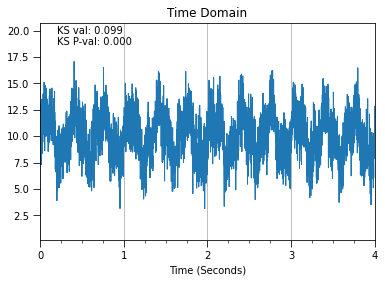

In [27]:
#add some noise
sinprops = [ {'amplitude':2, 'frequency':3, 'phase':0},
            {'amplitude':1, 'frequency':8, 'phase':0} ]
noiseprops = {'noise_mu':10, 'noise_sigma': 1.5}
sgl.Signal( sinprops=sinprops, noiseprops=noiseprops).plot_signal()

Text(0.5, 1.0, 'Pulse')

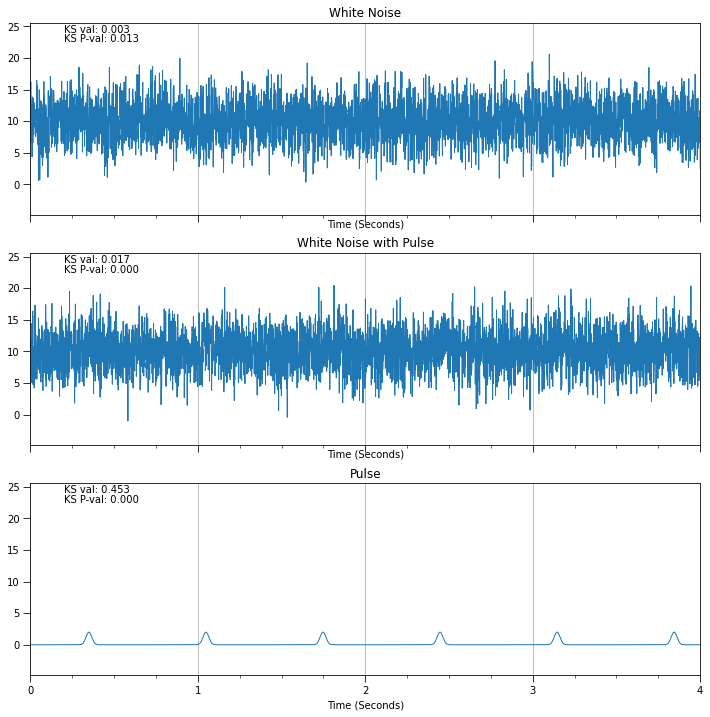

In [28]:
#signals can contain pulses too
fig,axs = plt.subplots(nrows=3, figsize=(12,12), sharex=True, sharey=True)
noiseprops = {'noise_mu':10, 'noise_sigma': 3.0}
pulseprops = pls.Pulse(pulse_width=0.5, pulse_height=2).to_dict()

sgl.Signal(pulseprops=None, noiseprops=noiseprops).plot_signal(ax=axs[0])
axs[0].set_title('White Noise')
sgl.Signal(pulseprops=pulseprops, noiseprops=noiseprops).plot_signal(ax=axs[1])
axs[1].set_title('White Noise with Pulse')
sgl.Signal(pulseprops=pulseprops).plot_signal(ax=axs[2])
axs[2].set_title('Pulse')



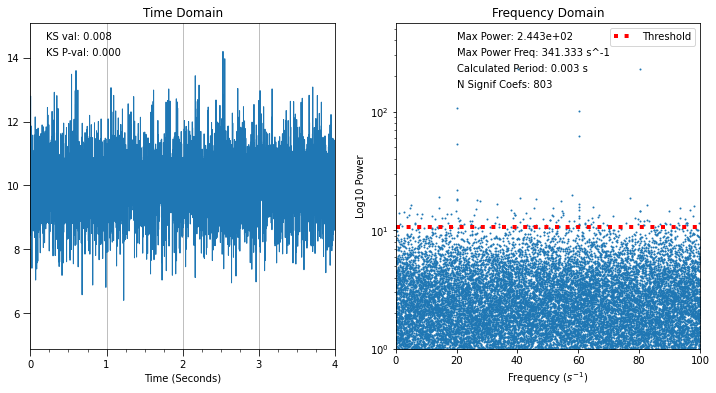

In [25]:
noiseprops = {'noise_mu':10, 'noise_sigma': 1.0}
pulseprops = pls.Pulse().to_dict() #get the default props
pulseprops['pulse_period'] = 5e-2 #seconds, 20 Hz
pulseprops['pulse_width'] = 0.1
sinprops = {'phase':0, 'amplitude':0.1, 'frequency':3}
#sig = sgl.Signal(pulseprops=pulseprops, sinprops=sinprops, noiseprops=noiseprops)
sig = sgl.Signal(pulseprops=pulseprops,noiseprops=noiseprops)
fig,axs = plt.subplots(ncols=2, figsize=(12,6))
sig.plot_signal(ax=axs[0])
sig.plot_spectrum(axs[1],maxfreq=100, ymin=1.0)